In [47]:
#imports for when I need quickReco
import numpy as np
from matplotlib import pyplot as plt
from quickRecoClass20 import quickReco
import math

In [48]:
def calculate_significance(signal, background, cut_value):
    sig_below=0.0 
    sig_above=0.0
    signal_count_below=0.0
    background_count_below = 0.0
    signal_count_above = 0.0
    background_count_above = 0.0
    
    
    signal_length = len(signal)
    background_length=len(background)
    
    for i in range(signal_length):
        if signal[i]<cut_value:
            signal_count_below=signal_count_below+1.0;
        if signal[i]>cut_value:
            signal_count_above=signal_count_above+1.0;

    for i in range(background_length):
        if background[i]<cut_value:
            background_count_below=background_count_below+1.0;
        if background[i]>cut_value:
            background_count_above=background_count_above+1.0;
     
    if signal_count_below < 10.0:
        sig_below = 0.0
    elif background_count_below < 10.0:
        sig_below = 0.0
    else:
        sig_below = (signal_count_below/math.sqrt((background_count_below)))
    if signal_count_above < 10.0:
        sig_above = 0.0
    elif background_count_above < 10.0:
        sig_above = 0.0
    else:
        sig_above = (signal_count_above/math.sqrt((background_count_above)))    
    return(sig_below, sig_above);


In [49]:
def calculate_bounds(signal,background):
    sig_low = 2000000000000000000000.0;#highest value a double can have if this was C. I just picked a really big number
    back_low = 2000000000000000000000.0;#highest value a double can have
    sig_high = -2000000000000000000000.0; #lowest value a double can have
    back_high = -2000000000000000000000.0; #lowest value a double can have
    
    signal_length = len(signal)
    background_length=len(background)
    
    for i in range(signal_length):
        if signal[i]<sig_low:
            sig_low = signal[i]
        elif signal[i]>sig_high:
            sig_high = signal[i]
        else:
            continue

    for i in range(background_length):
        if background[i]<back_low:
            back_low = background[i]
        elif background[i]>back_high:
            back_high=background[i]
        else:
            continue    

    highest=0.0
    lowest =0.0
    
    if sig_high < back_high:
        highest=sig_high
    else :
        highest=back_high
    
    if sig_low > back_low:
        lowest=sig_low;
    else:
        lowest=back_low
    
    return(lowest, highest)

In [50]:
def calculate_increment(lower, upper, nsteps):
    return((upper-lower)/(nsteps))

In [51]:
def calculate_best_cut(signal, background):
    upper = 0.0
    lower = 0.0
    lower, upper = calculate_bounds(signal, background)
    
    nsteps = 100.0 #insert value here
    increment = calculate_increment (lower, upper, nsteps)
    
    cut = lower +(0.5*increment)
    
    best_cut = 0.0 
    best_significance=0.0
    direction = 'empty'
    
    while cut<upper:
        significance_below, significance_above = calculate_significance(signal, background, cut)
        if significance_below > best_significance:
            best_significance = significance_below
            best_cut=cut
            direction = 'below'
        if significance_above > best_significance:
            best_significance = significance_above
            best_cut = cut
            direction = 'above'
        cut=cut + increment
    return(best_cut, best_significance, direction)

In [52]:
def removal_check(value, direction, cut):
    if direction == 'above':
        if value < cut:
            return(True)
        if value > cut:
            return(False)
    elif direction =='below':
        if value > cut:
            return(True)
        if value < cut:
            return(False)
    else:
        return(None)

In [53]:
def list_in_list_check(name):
    return(any(isinstance(el,list)for el in name))
#True means it is a list which contains lists.
#False means it is a normal list

In [54]:
def make_index_delete_list(data, direction, cut):
    indicies = []
    
    if list_in_list_check(data):
        appendable = []
        for i, array in enumerate(data):
            for j, value in enumerate(array):
                if j == 0:
                    first = True
                if removal_check(value, direction, cut):
                    if not first:
                        appendable.append(j)
                    if first:
                        appendable.append(i)
                        appendable.append(j)
                        first = False
            if appendable == []:
                continue
            else:
                appendable.append(j+1)
                indicies.append(appendable)
            appendable = []
        indicies.sort(reverse=True)
        return (indicies)
    
    if not list_in_list_check(data):
        for i,value in enumerate(data):
            if removal_check(value,direction,cut):
                indicies.append(i)
        indicies.sort(reverse=True)
        return(indicies)

In [55]:
def delete_cut_data(indicies, data_to_cut):
    if not list_in_list_check(indicies):
        for i in range(len(indicies)):
            del data_to_cut[indicies[i]]
        return(data_to_cut)
    if list_in_list_check(indicies):
        if not list_in_list_check(data_to_cut):
            for i, array in enumerate(indicies):
                nvalues=len(array)-2
                if nvalues == array[-1]:
                    del data_to_cut[array[0]]
            return(data_to_cut)
        if list_in_list_check(data_to_cut):
            for i, indicies_array in enumerate(indicies):
                nvalues = len(indicies_array)-2
                if nvalues==indicies_array[-1]:
                    del data_to_cut[indicies_array[0]]
                else:
                    dummy_array = []
                    dummy_array = indicies_array
                    del dummy_array[0]
                    del dummy_array[-1]
                    dummy_array.sort(reverse=True)
                    for j, index in enumerate(dummy_array):
                        del data_to_cut[indicies_array[0]][index]
            return(data_to_cut)

In [56]:
signal = quickReco('signal','\\Users\\student\\Desktop\\College\\Summer_2020\\Research\\DM_first_model_first_run\\ppTOllxdxd_signal')
background = quickReco('background','\\Users\\student\\Desktop\\College\\Summer_2020\\Research\\DM_first_model_first_run\\ppTOll background')

In [58]:
signal.process()
background.process()

...Loading file(s) 
\Users\student\Desktop\College\Summer_2020\Research\DM_first_model_first_run\ppTOllxdxd_signal\seed_10_xdxd_delphes_events.root
\Users\student\Desktop\College\Summer_2020\Research\DM_first_model_first_run\ppTOllxdxd_signal\seed_11_xdxd_delphes_events.root
\Users\student\Desktop\College\Summer_2020\Research\DM_first_model_first_run\ppTOllxdxd_signal\seed_12_xdxd_delphes_events.root
\Users\student\Desktop\College\Summer_2020\Research\DM_first_model_first_run\ppTOllxdxd_signal\seed_13_xdxd_delphes_events.root
\Users\student\Desktop\College\Summer_2020\Research\DM_first_model_first_run\ppTOllxdxd_signal\seed_14_xdxd_delphes_events.root
\Users\student\Desktop\College\Summer_2020\Research\DM_first_model_first_run\ppTOllxdxd_signal\seed_15_xdxd_delphes_events.root
\Users\student\Desktop\College\Summer_2020\Research\DM_first_model_first_run\ppTOllxdxd_signal\seed_16_xdxd_delphes_events.root
\Users\student\Desktop\College\Summer_2020\Research\DM_first_model_first_run\ppTOllx

Processed 67000 events...
Processed 67500 events...
Processed 68000 events...
Event 68369 has >2 electron. print (pT, charge)...
pt: 148.24008178710938, charge: 1
pt: 24.68724822998047, charge: -1
pt: 22.522756576538086, charge: -1
Processed 68500 events...
Processed 69000 events...
Event 69074 has >2 muon. print (pT, charge)...
pt: 79.2940444946289, charge: -1
pt: 69.6579818725586, charge: 1
pt: 39.04230499267578, charge: 1
Processed 69500 events...
Processed 70000 events...
Processed 70500 events...
Processed 71000 events...
Processed 71500 events...
Processed 72000 events...
Processed 72500 events...
Processed 73000 events...
Processed 73500 events...
Processed 74000 events...
Processed 74500 events...
Processed 75000 events...
Event 75156 has >2 electron. print (pT, charge)...
pt: 130.22637939453125, charge: 1
pt: 48.30398941040039, charge: -1
pt: 18.390188217163086, charge: -1
pt: 15.011821746826172, charge: 1
Processed 75500 events...
Processed 76000 events...
Event 76357 has >2 

Event 33368 has >2 muon. print (pT, charge)...
pt: 39.71359634399414, charge: -1
pt: 30.02721405029297, charge: -1
pt: 16.606050491333008, charge: 1
Processed 33500 events...
Processed 34000 events...
Processed 34500 events...
Processed 35000 events...
Processed 35500 events...
Processed 36000 events...
Processed 36500 events...
Processed 37000 events...
Processed 37500 events...
Processed 38000 events...
Processed 38500 events...
Processed 39000 events...
Processed 39500 events...
Processed 40000 events...
Processed 40500 events...
Processed 41000 events...
Processed 41500 events...
Processed 42000 events...
Processed 42500 events...
Processed 43000 events...
Processed 43500 events...
Processed 44000 events...
Processed 44500 events...
Processed 45000 events...
Processed 45500 events...
Processed 46000 events...
Processed 46500 events...
Processed 47000 events...
Processed 47500 events...
Processed 48000 events...
Event 48123 has >2 muon. print (pT, charge)...
pt: 41.465579986572266, 

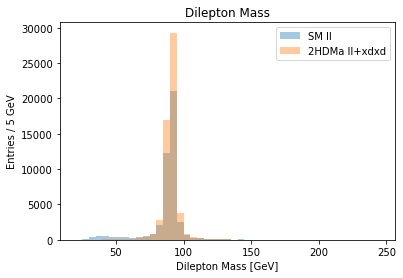

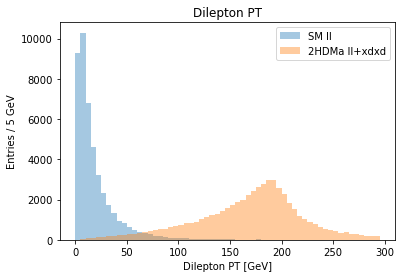

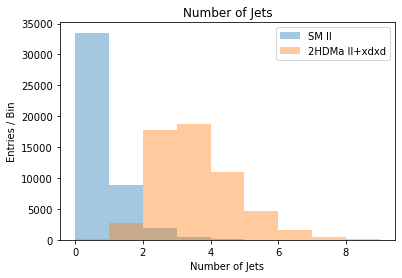

In [59]:
plt.hist(background.dileptonMass, bins=np.arange(20,250,5), alpha=0.4, label='SM ll')
plt.hist(signal.dileptonMass, bins=np.arange(20,250,5), alpha=0.4, label='2HDMa ll+xdxd')
plt.title('Dilepton Mass')
plt.xlabel('Dilepton Mass [GeV]')
plt.ylabel('Entries / 5 GeV')
plt.legend()
plt.show()

plt.hist(background.dileptonPT, bins=np.arange(0,300,5), alpha=0.4, label='SM ll')
plt.hist(signal.dileptonPT, bins=np.arange(0,300,5), alpha=0.4, label='2HDMa ll+xdxd')
plt.title('Dilepton PT')
plt.xlabel('Dilepton PT [GeV]')
plt.ylabel('Entries / 5 GeV')
plt.legend()
plt.show()

plt.hist(background.dilepton_Jets, bins=np.arange(0,10), alpha=0.4, label='SM ll')
plt.hist(signal.dilepton_Jets, bins=np.arange(0,10), alpha=0.4, label='2HDMa ll+xdxd')
plt.title('Number of Jets')
plt.xlabel('Number of Jets')
plt.ylabel('Entries / Bin')
plt.legend()
plt.show()

In [60]:
#Test
#list all of the variables that are being cut on here:
#.dileptonMass
#.dileptonPT
#.nJets
#

data1_sig = signal.dileptonMass
data1_back = background.dileptonMass
data2_sig = signal.dileptonPT
data2_back = background.dileptonPT
data3_sig = signal.dilepton_Jets
data3_back = background.dilepton_Jets

data1_cut, data1_significance, data1_direction = calculate_best_cut(data1_sig, data1_back)
print(data1_cut, data1_significance, data1_direction)
data2_cut, data2_significance, data2_direction = calculate_best_cut(data2_sig, data2_back)
print(data2_cut, data2_significance, data2_direction)
data3_cut, data3_significance, data3_direction = calculate_best_cut(data3_sig, data3_back)
print(data3_cut, data3_significance, data3_direction)

significance_list = [data1_significance, data2_significance, data3_significance]

cut1_max_significance = max(significance_list)



63.113006256826 277.71521086987747 above
159.3183964795088 3523.425652298162 above
3.030000000000002 1971.7548980663848 above


In [61]:
if cut1_max_significance == data1_significance:
    print("cut one was made on data1")
    cut1_cut = data1_cut
    cut1_direction = data1_direction
    
    indicies_sig_cut1 = make_index_delete_list(data1_sig, cut1_direction, cut1_cut)
    cut1_data1_sig = delete_cut_data(indicies_sig_cut1, data1_sig)
    cut1_data2_sig = delete_cut_data(indicies_sig_cut1, data2_sig)
    cut1_data3_sig = delete_cut_data(indicies_sig_cut1, data3_sig)
    
    indicies_back_cut1 = make_index_delete_list(data1_back, cut1_direction, cut1_cut)
    cut1_data1_back = delete_cut_data(indicies_back_cut1, data1_back)
    cut1_data2_back = delete_cut_data(indicies_back_cut1, data2_back)
    cut1_data3_back = delete_cut_data(indicies_back_cut1, data3_back)
    
elif cut1_max_significance == data2_significance:
    print("cut one was made on data2")
    cut1_cut = data2_cut
    cut1_direction = data2_direction
    
    indicies_sig_cut1 = make_index_delete_list(data2_sig, cut1_direction, cut1_cut)
    cut1_data1_sig = delete_cut_data(indicies_sig_cut1, data1_sig)
    cut1_data2_sig = delete_cut_data(indicies_sig_cut1, data2_sig)
    cut1_data3_sig = delete_cut_data(indicies_sig_cut1, data3_sig)
    
    indicies_back_cut1 = make_index_delete_list(data2_back, cut1_direction, cut1_cut)
    cut1_data1_back = delete_cut_data(indicies_back_cut1, data1_back)
    cut1_data2_back = delete_cut_data(indicies_back_cut1, data2_back)
    cut1_data3_back = delete_cut_data(indicies_back_cut1, data3_back)

elif cut1_max_significance == data3_significance:
    print("cut one was made on data3")
    cut1_cut = data3_cut
    cut1_direction = data3_direction
    
    indicies_sig_cut1 = make_index_delete_list(data3_sig, cut1_direction, cut1_cut)
    cut1_data1_sig = delete_cut_data(indicies_sig_cut1, data1_sig)
    cut1_data2_sig = delete_cut_data(indicies_sig_cut1, data2_sig)
    cut1_data3_sig = delete_cut_data(indicies_sig_cut1, data3_sig)
    
    indicies_back_cut1 = make_index_delete_list(data3_back, cut1_direction, cut1_cut)
    cut1_data1_back = delete_cut_data(indicies_back_cut1, data1_back)
    cut1_data2_back = delete_cut_data(indicies_back_cut1, data2_back)
    cut1_data3_back = delete_cut_data(indicies_back_cut1, data3_back)
else:
    print("An error has occured during Cut 1. No match for the max significance value could be found.")

cut one was made on data2


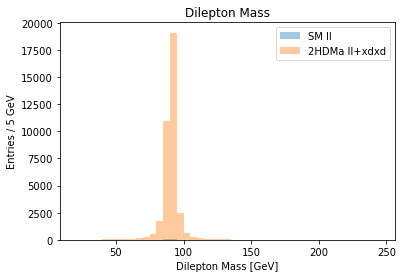

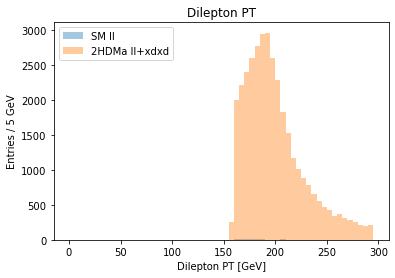

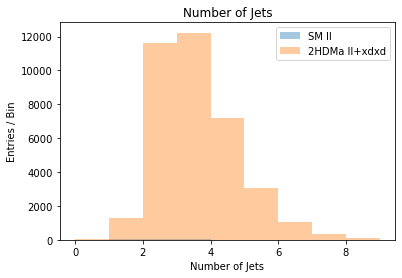

In [63]:
plt.hist(cut1_data1_back, bins=np.arange(20,250,5), alpha=0.4, label='SM ll')
plt.hist(cut1_data1_sig, bins=np.arange(20,250,5), alpha=0.4, label='2HDMa ll+xdxd')
plt.title('Dilepton Mass')
plt.xlabel('Dilepton Mass [GeV]')
plt.ylabel('Entries / 5 GeV')
plt.legend()
plt.show()

plt.hist(cut1_data2_back, bins=np.arange(0,300,5), alpha=0.4, label='SM ll')
plt.hist(cut1_data2_sig, bins=np.arange(0,300,5), alpha=0.4, label='2HDMa ll+xdxd')
plt.title('Dilepton PT')
plt.xlabel('Dilepton PT [GeV]')
plt.ylabel('Entries / 5 GeV')
plt.legend()
plt.show()

plt.hist(cut1_data3_back, bins=np.arange(0,10), alpha=0.4, label='SM ll')
plt.hist(cut1_data3_sig, bins=np.arange(0,10), alpha=0.4, label='2HDMa ll+xdxd')
plt.title('Number of Jets')
plt.xlabel('Number of Jets')
plt.ylabel('Entries / Bin')
plt.legend()
plt.show()